Text(0.5, 1.0, 'Booking percentage')

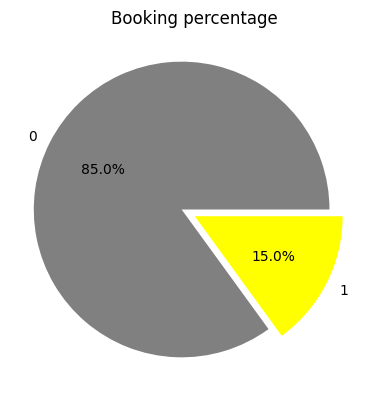

In [154]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


data = pd.read_csv('/content/customer_booking.csv', encoding='latin-1')
data = data.drop_duplicates()

booking_done = data['booking_complete'].squeeze()
plt.pie(booking_done.value_counts(), labels=['0', '1'], explode = [0.1, 0], colors = ['Grey', 'Yellow'] , autopct = '%1.1f%%')
plt.title('Booking percentage')

In [155]:
print("======================================Data Dimensions==============================================")
print("The data shape is ", data.shape)
print("======================================statistical Evaluations==============================================")
print(data.describe())
print("======================================Data Types of Data==============================================")
print(data.info())
print("======================================Unique value Count==============================================")
print(data.nunique())
print("======================================Null value Count==============================================")
print(data.isnull().sum())
print("======================================Not Null Value Count==============================================")
print(data.notnull().sum())

======================================Data Dimensions==============================================
The data shape is  (49281, 14)
======================================statistical Evaluations==============================================
       num_passengers  purchase_lead  length_of_stay   flight_hour  \
count    49281.000000   49281.000000    49281.000000  49281.000000   
mean         1.590187      84.723281       23.053976      9.070676   
std          1.016538      90.410229       33.832149      5.413099   
min          1.000000       0.000000        0.000000      0.000000   
25%          1.000000      21.000000        5.000000      5.000000   
50%          1.000000      51.000000       17.000000      9.000000   
75%          2.000000     115.000000       28.000000     13.000000   
max          9.000000     867.000000      778.000000     23.000000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         49281.000000          49281.000000       

In [158]:
data = data.dropna()

x = data.drop('booking_complete', axis = 1)
y = data.booking_complete

for col in x.select_dtypes(['object','float']):
  x[col], _ = x[col].factorize()

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   num_passengers         49281 non-null  int64
 1   sales_channel          49281 non-null  int64
 2   trip_type              49281 non-null  int64
 3   purchase_lead          49281 non-null  int64
 4   length_of_stay         49281 non-null  int64
 5   flight_hour            49281 non-null  int64
 6   flight_day             49281 non-null  int64
 7   route                  49281 non-null  int64
 8   booking_origin         49281 non-null  int64
 9   wants_extra_baggage    49281 non-null  int64
 10  wants_preferred_seat   49281 non-null  int64
 11  wants_in_flight_meals  49281 non-null  int64
 12  flight_duration        49281 non-null  int64
dtypes: int64(13)
memory usage: 5.3 MB


In [159]:
from sklearn.feature_selection import mutual_info_classif


miscore = mutual_info_classif(x,y)
miscore = pd.Series(miscore, name = 'MiScore', index = x.columns)
miscore = miscore.sort_values(ascending = False)

miscore

booking_origin           0.029597
wants_extra_baggage      0.009552
route                    0.006071
flight_duration          0.004356
wants_in_flight_meals    0.004235
flight_hour              0.003772
wants_preferred_seat     0.001803
num_passengers           0.001409
flight_day               0.001244
purchase_lead            0.001147
sales_channel            0.000010
trip_type                0.000000
length_of_stay           0.000000
Name: MiScore, dtype: float64

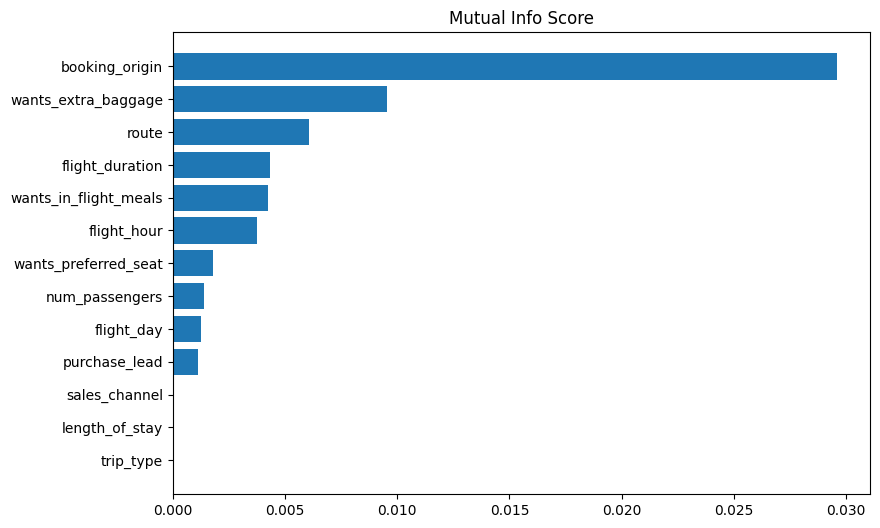

In [160]:
def plot_miscore(scores):
  scores = scores.sort_values(ascending = True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title('Mutual Info Score')

plt.figure(dpi = 100, figsize=(9,6))
plot_miscore(miscore)

In [172]:
from sklearn.model_selection import train_test_split
def splits(x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

  return (x_train, x_test, y_train, y_test)

In [173]:
from sklearn.preprocessing import MinMaxScaler

def scale(x):
    scaler = MinMaxScaler()
    scaler.fit(x)
    return x


In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

fea = ['booking_origin', 'wants_extra_baggage', 'route', 'flight_duration', 'wants_in_flight_meals', 'flight_hour']
x = data[fea]
# one hot encoding
x = pd.get_dummies(x, columns = fea)
y = data.booking_complete

forest = RandomForestClassifier(random_state = 1)
x_train, x_test, y_train, y_test = splits(x, y)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

The total number of bookings possibilities are - 6.549793036279524 %
The total number of bookings non-possibilities are - 93.45020696372048 %


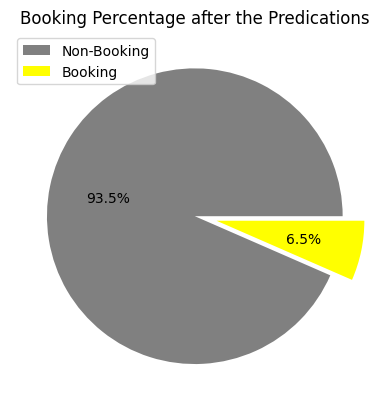

In [269]:
results = forest.predict(x_test)

count1, count0 = 0, 0

for x in results:
  if x == 1:
    count1+=1
  else:
    count0+=1

print("The total number of bookings possibilities are -", (count1/(count0+count1)*100),"%")
print("The total number of bookings non-possibilities are -", (count0/(count0+count1)*100),"%")

plt.title("Booking Percentage after the Predications")
legends = ['Non-Booking', 'Booking']
plt.pie([count0, count1], colors=['grey', 'yellow'], explode = [0, 0.15], autopct = '%1.1f%%')
plt.legend(legends)
plt.show()


In [187]:
print("The model is ", accuracy_score(y_test,results)*100,"% Accurate.")
print("It's AUC Score is ", roc_auc_score(y_test,results), ".")

The model is  82.97216135053974 % Accurate.
It's AUC Score is  0.551619536773235 .


In [197]:
xx_train, xx_test, yy_train, yy_test = splits(x, y)

forest2 = RandomForestClassifier(random_state=1)
forest2.fit(xx_train, yy_train)

RandomForestClassifier(random_state=1)

The total number of bookings possibilities are - 6.549793036279524 %
The total number of bookings non-possibilities are - 93.45020696372048 %


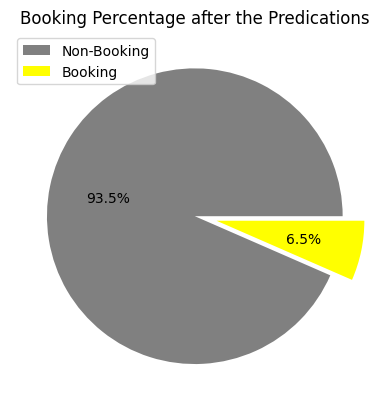

In [271]:
results2 = forest2.predict(xx_test)

count11, count00 = 0, 0

for x in results2:
  if x == 1:
    count11+=1
  else:
    count00+=1

print("The total number of bookings possibilities are -", (count11/(count00+count11)*100),"%")
print("The total number of bookings non-possibilities are -", (count00/(count00+count11)*100),"%")

plt.title("Booking Percentage after the Predications")
legends = ['Non-Booking', 'Booking']
plt.pie([count00, count11], colors=['grey', 'yellow'], explode = [0, 0.15], autopct = '%1.1f%%')
plt.legend(legends)
plt.show()


In [199]:
print("The model is ", accuracy_score(yy_test,results)*100,"% Accurate.")
print("It's AUC Score is ", roc_auc_score(yy_test,results), ".")

The model is  82.97216135053974 % Accurate.
It's AUC Score is  0.551619536773235 .
